In [3]:
import numpy as np
import gym
from collections import deque
from tqdm import tqdm

# Agents
from CarRacingAgents import CarRacingAgent01, CarRacingAgent02, CarRacingAgent03

# Plots
from CarRacingPlots import plot_performance, plot_episode_duraton, plot_epsilon

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': pil_image.BICUBIC,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:39: DeprecationWarning: HAMMING is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.HAMMING instead.
  'hamming': pil_image.HAMMING,
c:\ProgramData\Anaconda3\envs\tf\lib\site

In [17]:
# Load Agent
agent_name = 'agent_01__850'

agent = CarRacingAgent01(epsilon=0)
#agent.load(f'trained_agents/{agent_name}.h5')

agent_performance = np.load(f'trained_agents/{agent_name}.npy')

C:\Users\carlo\AppData\Roaming\Python\Python39\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


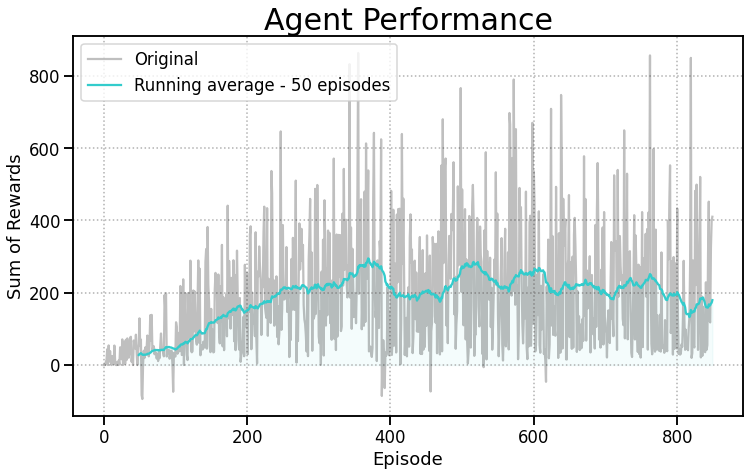

In [18]:
# Plots
plot_performance(agent_performance, title = 'Agent Performance')

C:\Users\carlo\AppData\Roaming\Python\Python39\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


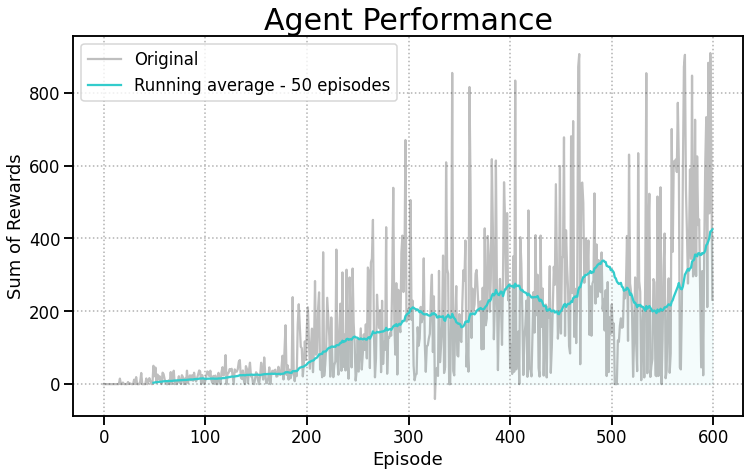

In [31]:
# Plots
plot_performance(agent_performance, title = 'Agent Performance')

In [9]:
# Set agent to tets
agent = agent
agent.epsilon = 0 # Set epsilon to 0

render = True
seed_nums = [32, 45, 46, 83, 123, 934, 563, 1023, 27546, 32450]
time_steps = 1000

scores = []
env = gym.make('CarRacing-v1', continuous=False)

for e, seed_num in tqdm(enumerate(seed_nums)):
    init_state = env.reset(seed=seed_num)
    init_state = agent.process_state_image(init_state, env)

    total_reward = 0
    punishment_counter = 0
    state_frame_stack_queue = deque([init_state]*agent.frame_stack_num, maxlen=agent.frame_stack_num)
    
    for i in range(time_steps):
        
        if render:
            env.render()

        current_state_frame_stack = agent.generate_state_frame_stack_from_queue(state_frame_stack_queue)
        action = agent.act(current_state_frame_stack)
        next_state, reward, done, info = env.step(action)

        total_reward += reward

        next_state = agent.process_state_image(next_state, env)
        state_frame_stack_queue.append(next_state)

        if done:
            print(f'Reward: {round(total_reward,2)}')
            scores.append(round(total_reward,2))
            break

if render:
    env.close()

print(f"Results: {scores}. \n Avg: {np.mean(scores)}")

1it [01:13, 73.58s/it]

Reward: 716.95


2it [02:24, 71.75s/it]

Reward: 549.68


2it [03:18, 99.28s/it]


KeyboardInterrupt: 